In [3]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("..") / "data"

files = sorted([p.name for p in DATA_DIR.glob("*.csv")])
print(files)


['commits.csv', 'events.csv', 'languages.csv', 'profile.csv', 'readmes.csv', 'repos.csv']


In [4]:
profile = pd.read_csv(DATA_DIR / "profile.csv")
repos = pd.read_csv(DATA_DIR / "repos.csv")
commits = pd.read_csv(DATA_DIR / "commits.csv")
langs = pd.read_csv(DATA_DIR / "languages.csv")
readmes = pd.read_csv(DATA_DIR / "readmes.csv")
events = pd.read_csv(DATA_DIR / "events.csv")

(profile.shape, repos.shape, commits.shape, langs.shape, readmes.shape, events.shape)


((1, 9), (7, 17), (23, 7), (17, 3), (5, 3), (32, 4))

In [5]:
display(profile.head(3))
display(repos.head(3))
display(commits.head(3))


,username,name,bio,company,location,public_repos,followers,following,created_at
0,henryzhan013,henryzhan13,NaN,NaN,"Dallas-Fort Worth, Texas",7,0,0,2023-10-13T01:52:05Z


,repo_name,full_name,description,language,created_at,updated_at,pushed_at,size_kb,stargazers_count,watchers_count,forks_count,open_issues_count,is_fork,is_private,default_branch,topics,html_url
0,Competitive-Programming,henryzhan013/Competitive-Programming,My solutions to competitive programming problems,NaN,2023-10-29T11:34:30Z,2023-10-29T11:34:31Z,2024-02-15T02:22:24Z,103,0,0,0,0,False,False,main,NaN,https://github.com/henryzhan013/Competitive-Pr...
1,leetcode-solutions,henryzhan013/leetcode-solutions,My solutions to leetcode problems,Python,2026-01-24T23:46:59Z,2026-02-10T15:00:19Z,2026-02-10T14:59:57Z,6,0,0,0,0,False,False,main,NaN,https://github.com/henryzhan013/leetcode-solut...
2,nfl-bdb-2024,henryzhan013/nfl-bdb-2024,NaN,Jupyter Notebook,2025-08-19T15:18:46Z,2025-08-20T13:33:53Z,2025-08-20T13:33:49Z,2715,0,0,0,0,False,False,main,NaN,https://github.com/henryzhan013/nfl-bdb-2024


,repo_name,sha,message,author_name,author_email,date,html_url
0,Competitive-Programming,54322de1508a411321a161d8910ad30af270bafb,Create 1772E,henryzhan013,147782833+henryzhan013@users.noreply.github.com,2023-12-10T16:41:39Z,https://github.com/henryzhan013/Competitive-Pr...
1,Competitive-Programming,59aab40c997b0ef9cc8651a7f15d5bda49455698,Create 1738C,henryzhan013,147782833+henryzhan013@users.noreply.github.com,2023-11-05T02:13:11Z,https://github.com/henryzhan013/Competitive-Pr...
2,Competitive-Programming,e171169c332167305032247266e55f2cb6cd3ac7,Create 1760F,henryzhan013,147782833+henryzhan013@users.noreply.github.com,2023-11-03T03:13:37Z,https://github.com/henryzhan013/Competitive-Pr...


In [7]:
# Repos dates
for col in ["created_at", "updated_at", "pushed_at"]:
    if col in repos.columns:
        repos[col] = pd.to_datetime(repos[col], errors="coerce", utc=True)

# Commits date
commits["date"] = pd.to_datetime(commits["date"], errors="coerce", utc=True)

# Events date
events["created_at"] = pd.to_datetime(events["created_at"], errors="coerce", utc=True)

In [8]:

(commits["date"].min(), commits["date"].max(), repos["created_at"].min(), repos["created_at"].max())

(Timestamp('2023-10-29 13:02:44+0000', tz='UTC'),
 Timestamp('2026-02-10 14:59:51+0000', tz='UTC'),
 Timestamp('2023-10-29 11:34:30+0000', tz='UTC'),
 Timestamp('2026-02-06 22:07:35+0000', tz='UTC'))

In [9]:
summary = {
    "repos": len(repos),
    "commits": len(commits),
    "unique_repos_with_commits": commits["repo_name"].nunique(),
    "repos_with_readme": readmes["repo_name"].nunique(),
    "events": len(events),
    "unique_languages": langs["language"].nunique() if len(langs) else 0,
}
summary


{'repos': 7,
 'commits': 23,
 'unique_repos_with_commits': 5,
 'repos_with_readme': 5,
 'events': 32,
 'unique_languages': 9}

In [10]:
commits_per_repo = commits.groupby("repo_name")["sha"].count().sort_values(ascending=False)
commits_per_repo


repo_name
roadtrip-planner           7
polars                     6
leetcode-solutions         5
Competitive-Programming    4
roadtripplanner            1
Name: sha, dtype: int64

In [14]:
dupe_rows = commits.duplicated(subset=["repo_name", "sha"]).sum()
missing_dates = commits["date"].isna().mean()
empty_msgs = (commits["message"].fillna("").str.strip() == "").mean()

{
    "duplicate_commit_rows": int(dupe_rows),
    "missing_commit_dates_frac": float(missing_dates),
    "empty_messages_frac": float(empty_msgs),
    "avg_msg_len": float(commits["message"].fillna("").str.len().mean()),
}


{'duplicate_commit_rows': 0,
 'missing_commit_dates_frac': 0.0,
 'empty_messages_frac': 0.0,
 'avg_msg_len': 78.1304347826087}

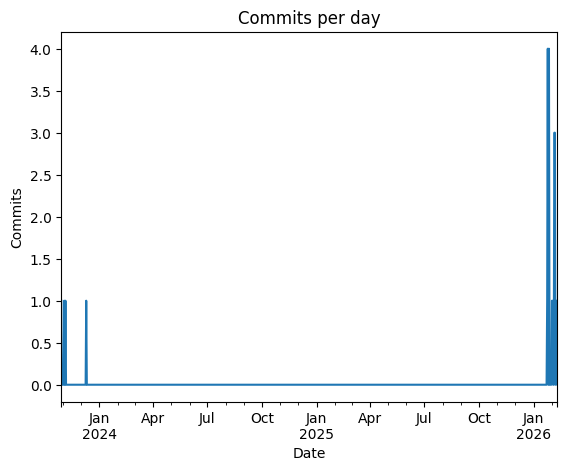

In [15]:
import matplotlib.pyplot as plt

daily = commits.dropna(subset=["date"]).set_index("date").resample("D")["sha"].count()

plt.figure()
daily.plot()
plt.title("Commits per day")
plt.xlabel("Date")
plt.ylabel("Commits")
plt.show()
